Escribe un programa que construya la tabla de frecuencias de un conjunto de datos. Además, tu programa deberá graficar el histograma.

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

FILE_PATH = './data01.txt'
DECIMALS = 3

In [2]:
with open(FILE_PATH, 'r') as file:
    lines = file.readlines()
    num_array = [float(line.strip()) for line in lines]

- N: Representa la cantidad total de elementos en los datos.

- C: Es el número de clases que se calcula utilizando la fórmula 1 + (3.3 * math.log10(N)). Esta fórmula es una aproximación de la regla de Sturges, que se utiliza para determinar el número óptimo de clases en un histograma. Se redondea el valor de C hacia arriba para asegurar que sea un número entero.

- minNum y maxNum: Son los valores mínimo y máximo de la lista num_array, respectivamente, redondeados al número de decimales especificado en DECIMALS.

- W: Es el ancho de clase, que se calcula como el rango de los datos (maxNum - minNum) dividido por el número de clases (C). Este valor se redondea al número de decimales especificado en DECIMALS.

In [3]:
N = len(num_array)
C = math.ceil(1 + (3.3 * math.log10(N)))

minNum, maxNum = round(min(num_array), DECIMALS), round(max(num_array), DECIMALS)
W = round((maxNum - minNum) / C, DECIMALS)

print(f"""
Datos:
  Número total de elementos (N): {N}
  Rango de la muestra: {minNum} - {maxNum}
  Número de clases (C): {C}
  Ancho de clase (W): {W}
""")


Datos:
  Número total de elementos (N): 998
  Rango de la muestra: 0.0 - 1.0
  Número de clases (C): 11
  Ancho de clase (W): 0.091



Se itera sobre un rango que va desde 0 hasta C, donde C es el número de clases calculado anteriormente. En cada iteración, se calculan los límites del intervalo (intervalo_min y intervalo_max) basados en el ancho de clase W y el valor mínimo minNum. En la última iteración, si el intervalo final no abarca todo el rango de valores, se ajusta intervalo_max para que sea igual al valor máximo maxNum.

Se calcula la frecuencia de los datos que caen dentro de cada intervalo.

[0.0 - 0.091) --> 92
[0.091 - 0.182) --> 94
[0.182 - 0.273) --> 91
[0.273 - 0.364) --> 92
[0.364 - 0.45499999999999996) --> 96
[0.45499999999999996 - 0.546) --> 90
[0.546 - 0.637) --> 76
[0.637 - 0.728) --> 78
[0.728 - 0.819) --> 87
[0.819 - 0.9099999999999999) --> 110
[0.9099999999999999 - 1.0) --> 92


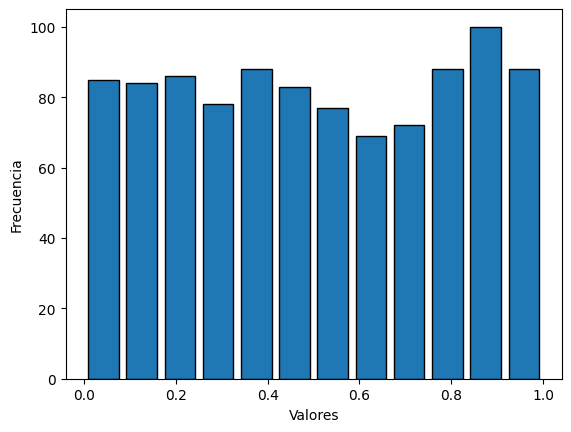

In [6]:
intervalos = []

for i in range(C):
    intervalo_min = minNum + i * W
    intervalo_max = minNum + (i + 1) * W
    if i == C - 1:
        intervalo_max = maxNum
    count_interval = sum(1 for num in num_array if intervalo_min <= num < intervalo_max)
    intervalos.append((intervalo_min, intervalo_max, count_interval))
    print(f"[{intervalo_min} - {intervalo_max}) --> {count_interval}")

plt.hist(num_array, bins=(C + 1), edgecolor='black', rwidth=0.8)
plt.ylabel('Frecuencia')
plt.xlabel('Valores')
plt.show()